## CONFIGURANDO NOTEBOOK - RETIRANDO AVISOS

In [1]:
# IGNRANDO ALERTAS

import warnings

warnings.filterwarnings('ignore')

## IMPORT DAS BIBLIOTECAS A SEREM USADAS E DO DATASET BRUTO INICIAL

In [2]:
# IMPORT DAS BIBLIOTECAS A SEREM USADAS

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from prince import MCA, FAMD
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [3]:
# LEITURA DO DATASET E CRIAÇÃO DE BACKUP

df_raw = pd.read_excel("C:\\Users\\Dudu_\\OneDrive\\Documentos\\Estudos\\8. Freelancer - Clusterização de Acidentes\\Base Teste kmeans.xlsx", sheet_name='Sheet1')

In [4]:
# CRIANDO UM DF DE BACKUP

df = df_raw.copy()

In [5]:
# PRÉ-VISUALIZAÇÃO DOS DADOS

df.head()

,CBO,SEXO,IDADE,FILIAÇÃO,CNAE,MUNICÍPIO,UF,AGENTE CAUSADOR,TIPO,CID DESCRIÇÃO,ÓBITO,NATUREZA DA LESÃO,PARTE DO CORPO ATINGIDA,EMITENTE,ORIGEM CADASTRAMENTO
0,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...,Masculino,48,Empregado,"29 - FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQ...",Porto Alegre,REGIÃO SUL,AGENTES ERGONÔMICOS,Doença,M75,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,Empregador,Internet
1,TÉCNICOS DE NÍVEL MÉDIO,Masculino,54,Empregado,"29 - FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQ...",Caxias do Sul,REGIÃO SUL,AGENTES MECÂNICOS OU ACIDENTAIS,Doença,M75,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,Empregador,Internet
2,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...,Masculino,35,Empregado,24 - METALURGIA,Joinville,REGIÃO SUL,AGENTES MECÂNICOS OU ACIDENTAIS,Típico,S40,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,Empregador,Internet
3,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...,Masculino,22,Empregado,"29 - FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQ...",Goiana,REGIÃO NORDESTE,AGENTES MECÂNICOS OU ACIDENTAIS,Típico,S64,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,Empregador,Internet
4,TRABALHADORES DE SERVIÇOS ADMINISTRATIVOS,Feminino,29,Empregado,28 - FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS,Joinville,REGIÃO SUL,AGENTES MECÂNICOS OU ACIDENTAIS,Trajeto,M22,Não,ACIDENTE OCUPACIONAL,MEMBROS INFERIORES,Empregador,Internet


## ANÁLISE E TRATAMENTO DOS DADOS

In [6]:
# DIMENSÕES DO DATASET

df.shape

(123799, 15)

In [7]:
# ANÁLISE GERAL - TIPO DE DADOS E QUANTIDADE DE NULOS

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123799 entries, 0 to 123798
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CBO                      123799 non-null  object
 1   SEXO                     123799 non-null  object
 2   IDADE                    123799 non-null  int64 
 3   FILIAÇÃO                 123799 non-null  object
 4   CNAE                     123799 non-null  object
 5   MUNICÍPIO                123799 non-null  object
 6   UF                       123799 non-null  object
 7   AGENTE CAUSADOR          123799 non-null  object
 8   TIPO                     123799 non-null  object
 9   CID DESCRIÇÃO            123799 non-null  object
 10  ÓBITO                    123799 non-null  object
 11  NATUREZA DA LESÃO        123799 non-null  object
 12  PARTE DO CORPO ATINGIDA  123799 non-null  object
 13  EMITENTE                 123799 non-null  object
 14  ORIGEM CADASTRAMENTO

In [8]:
# ANALISANDO GRANULARIDADE DE CADA COLUNA

valores_unicos = []
for i in df.columns:
  valores_unicos.append(df[i].nunique())

pd.DataFrame({'Coluna':df.columns,
              'Valores únicos':valores_unicos})

,Coluna,Valores únicos
0,CBO,8
1,SEXO,4
2,IDADE,60
3,FILIAÇÃO,4
4,CNAE,6
5,MUNICÍPIO,1905
6,UF,5
7,AGENTE CAUSADOR,5
8,TIPO,6
9,CID DESCRIÇÃO,716


In [9]:
# SELECIONANDO APENAS AS VARIAVEIS CATEGÓRICAS

cat_cols = df.select_dtypes(include='O').columns

In [10]:
# FOI PERCEBIDO QUE MUITAS COLUNAS POSSUIAM CARACTERES DE ESPAÇO NO FINAL DA STRING, O QUE FAZIA O PANDAS RECONHECER MESMAS STRINGS COMO CATEGORIAS DIFERENTES
 # EXEMPLO CLARO SÃO OS 51 ESTADOS DO BR NO DATASET, SENDO QUE EXISTEM 27 APENAS

for i in cat_cols:
  df[i] = df[i].str.rstrip()

In [11]:
# ALTERANDO O TIPO DE DADOS DAS VARIÁVEIS CATEGÓRICAS DE OBJECT PARA CATEGORY

df[cat_cols] = df[cat_cols].astype('category')

In [12]:
# CONFERINDO O RESULTADO DA TRANSFORMAÇÃO ACIMA

df.dtypes

CBO                        category
SEXO                       category
IDADE                         int64
FILIAÇÃO                   category
CNAE                       category
MUNICÍPIO                  category
UF                         category
AGENTE CAUSADOR            category
TIPO                       category
CID DESCRIÇÃO              category
ÓBITO                      category
NATUREZA DA LESÃO          category
PARTE DO CORPO ATINGIDA    category
EMITENTE                   category
ORIGEM CADASTRAMENTO       category
dtype: object

In [13]:
# CONFERINDO OS NOVOS VALORES ÚNICOS, AGORA CORRETOS

valores_unicos = []
for i in df.columns:
  valores_unicos.append(df[i].nunique())

pd.DataFrame({'Coluna':df.columns,
              'Valores únicos':valores_unicos})

,Coluna,Valores únicos
0,CBO,8
1,SEXO,2
2,IDADE,60
3,FILIAÇÃO,2
4,CNAE,6
5,MUNICÍPIO,1905
6,UF,5
7,AGENTE CAUSADOR,5
8,TIPO,3
9,CID DESCRIÇÃO,716


# SELEÇÃO DE COLUNAS

In [14]:
# FOI DECIDIDO RETIRAR VARIÁVEIS QUE NÃO FAZIAM MUITA DIFERENÇA PARA O PROBLEMA

vars_excluidas = ['MUNICÍPIO','EMITENTE','ORIGEM CADASTRAMENTO','CID DESCRIÇÃO']

df.drop(vars_excluidas,axis=1,inplace=True)

In [15]:
# NOVA QUANTIDADE DE COLUNAS

print(df.shape[1],'colunas restantes.')

11 colunas restantes.


In [16]:
# TRANSFORMANDO AS VARIAVEIS CATEGORICAS EM DUMMIES

df_dummy = pd.get_dummies(df)

## TESTANDO CLUSTERIZAÇÃO COM DUMMIES

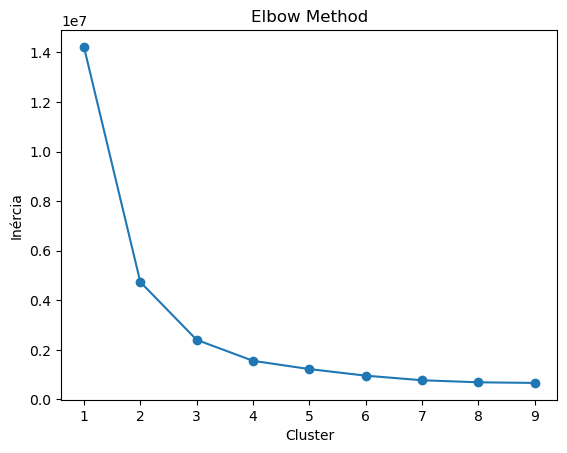

In [17]:
# DEFININDO O K ÓTIMO

k_otimo = []
for K in range(1,10):
  kmean = KMeans(n_clusters= K, init='k-means++', n_init='auto')
  kmean.fit(df_dummy)
  k_otimo.append(kmean.inertia_)

df_clusters = pd.DataFrame({'Cluster':range(1,10),'SSE':k_otimo})
plt.plot(df_clusters['Cluster'], df_clusters['SSE'], marker='o')
plt.xlabel("Cluster")
plt.ylabel("Inércia")
plt.title("Elbow Method");

In [18]:
# NORMALIZANDO A BASE

df_normalized = df_dummy.div(df_dummy.sum(axis=1),axis='rows')

In [19]:
# CLUSTERIZANDO A BASE DE DADOS

kmeans = KMeans(n_clusters= 4, n_init='auto')
kmeans.fit(df_normalized)

df_normalized['cluster'] = kmeans.predict(df_normalized)

In [20]:
df.loc[:,'cluster'] = df_normalized.cluster

In [21]:
# VISUALIZANDO A CONCENTRAÇÃO DE CADA CATEGORIA OU MÉDIA DOS VALORES NUMÉRICOS DE CADA CLUSTER - DUMMIES

for col in df.drop('cluster',axis=1).columns:
    for cl in np.sort(df.cluster.unique()):
        if df.dtypes[col] == 'category':
            vc = 100 * df.loc[df.cluster == cl,col].value_counts() / (df.cluster==cl).sum()
            for cat,cnt in vc.reset_index().values:
                print(f'{cl:d};{col}_{str(cat):s};{cnt:5.2f}%'.replace('.',','))
        else:
            print(f'{cl:d};{col};{df.loc[df.cluster==cl,col].mean():.2f}'.replace('.',','))

for col in df.drop('cluster',axis=1).columns:
    if df.dtypes[col] == 'category':
        vc = 100 * df.loc[:,col].value_counts() / (df.shape[0])
        for cat,cnt in vc.reset_index().values:
            print(f'ALL;{col}_{str(cat):s};{cnt:5.2f}%'.replace('.',','))
    else:
        print(f'All;{col};{df.loc[:,col].mean():.2f}'.replace('.',','))

0;CBO_TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS;84,08%
0;CBO_TRABALHADORES DE SERVIÇOS ADMINISTRATIVOS; 5,35%
0;CBO_TRABALHADORES DA MANUTENÇÃO E REPARO; 5,32%
0;CBO_TÉCNICOS DE NÍVEL MÉDIO; 3,69%
0;CBO_TRABALHADORES DOS SERVIÇOS, VENDEDORES DO COMÉRCIO EM LOJAS E MERCADOS; 1,20%
0;CBO_TRABALHADORES AGROPECUÁRIOS, FLORESTAIS, DA CAÇA E PESCA; 0,15%
0;CBO_PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES; 0,14%
0;CBO_MEMBROS SUPERIOES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS E GERENTES; 0,08%
1;CBO_TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS;79,18%
1;CBO_TÉCNICOS DE NÍVEL MÉDIO; 7,11%
1;CBO_TRABALHADORES DA MANUTENÇÃO E REPARO; 7,07%
1;CBO_TRABALHADORES DE SERVIÇOS ADMINISTRATIVOS; 4,12%
1;CBO_TRABALHADORES DOS SERVIÇOS, VENDEDORES DO COMÉRCIO EM LOJAS E MERCADOS; 1,23%
1;CBO_PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES; 0,72%
1;CBO_MEMBROS SUPERIOES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS E GERENT

## ANALISANDO CLUSTERS CRIADOS DUMMIES

In [22]:
# IMPORT DO EXCEL CRIADO COM O PRINT GERADO ACIMA
df_analise = pd.read_excel("C:\\Users\\Dudu_\\OneDrive\\Documentos\\Estudos\\8. Freelancer - Clusterização de Acidentes\\2. Resultados dos Modelos\\resultados_cluster_dummies.xlsx")

In [23]:
# CRIANDO UMA TABELA DINAMICA COM O EXCEL CRIADO E ESTILIZANDO AS CELULAS DE ACORDO COM SEUS VALORES

tb_dinamica = df_analise.pivot_table(index='Coluna',columns='Cluster',values='%',aggfunc='mean').reset_index().drop('All',axis=1)

tb_dinamica['ALL'] = tb_dinamica['ALL'].fillna(34.84)

In [24]:
# PLOTANDO O DF ESTILIZADO CRIADO

tb_dinamica.style.background_gradient(cmap='Reds',axis=1)

Cluster,Coluna,0,1,2,3,ALL
0,AGENTE CAUSADOR_AGENTES BIOLÓGICOS,0.008100,0.008700,0.005000,0.007000,0.007500
1,AGENTE CAUSADOR_AGENTES ERGONÔMICOS,0.025700,0.032300,0.008300,0.013300,0.022000
2,AGENTE CAUSADOR_AGENTES FÍSICOS,0.012200,0.018400,0.007700,0.010200,0.012900
3,AGENTE CAUSADOR_AGENTES MECÂNICOS OU ACIDENTAIS,0.884300,0.889100,0.922300,0.883300,0.891500
4,AGENTE CAUSADOR_AGENTES QUÍMICOS,0.069600,0.051500,0.056700,0.086200,0.066100
5,"CBO_MEMBROS SUPERIOES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS E GERENTES",0.004100,0.006600,0.000800,0.001600,0.003700
6,CBO_PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES,0.007100,0.006600,0.001400,0.005100,0.005600
7,"CBO_TRABALHADORES AGROPECUÁRIOS, FLORESTAIS, DA CAÇA E PESCA",0.001000,0.002000,0.001600,0.001100,0.001400
8,CBO_TRABALHADORES DA MANUTENÇÃO E REPARO,0.067200,0.084900,0.054200,0.060600,0.068700
9,CBO_TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS,0.799400,0.785800,0.838900,0.815400,0.805400


## TESTANDO FAMD 

In [25]:
# RETIRANDO A COLUNA DE CLUSTER CRIADA COM O ALGORITMO ANTERIOR E SALVANDO EM UMA NOVA VARIAVEL

df_famd = df.drop('cluster',axis=1)

# ALTERANDO A VARIAVEL IDADE DE INT PARA FLOAT - O ALGORITMO APENAS RECONHECE FLOAT

df_famd['IDADE'] = df_famd['IDADE'].astype('float64')

In [26]:
from prince import FAMD

# DEFININDO O FAMD
famd = FAMD(n_components=2, random_state=42)
famd_result = famd.fit(df_famd)

# COORDENADAS NOS DOIS FATORES CRIADOS
row_coordinates = famd_result.row_coordinates(df_famd)
row_coordinates

component,0,1
0,19.406282,3.639899
1,10.042603,1.978815
2,-1.072693,2.646966
3,1.606505,-0.833427
4,-0.190108,-4.784886
...,...,...
123794,-0.560028,-1.210241
123795,0.178961,-1.003031
123796,0.435784,-0.439671
123797,0.211319,-2.630880


In [27]:
# CLUSTERIZANDO AS COORDENADAS CRIADAS COM O FAMD

kmeans = KMeans(n_clusters= 4, n_init='auto',random_state=42)
kmeans.fit(row_coordinates)

df_famd['cluster'] = kmeans.predict(row_coordinates)

In [28]:
# SALVANDO O RESULTADO DOS CLUSTERS NO DF DE COORDENADAS

row_coordinates['cluster'] = df_famd['cluster']

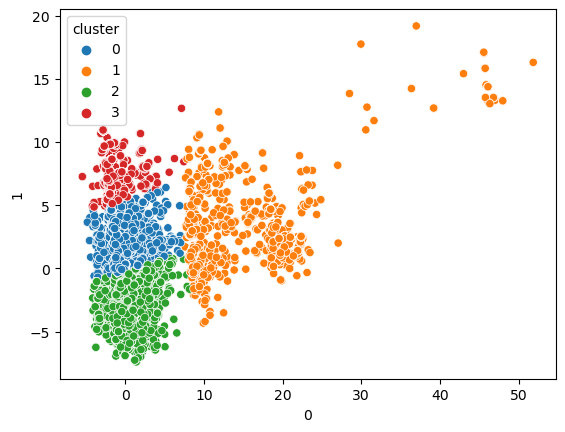

In [29]:
# PLOTANDO AS COORDENADAS EM UM GRÁFICO DE DISPERSÃO

sns.scatterplot(row_coordinates, x=0,y=1,hue='cluster',palette='tab10');

In [30]:
df_famd.head()

,CBO,SEXO,IDADE,FILIAÇÃO,CNAE,UF,AGENTE CAUSADOR,TIPO,ÓBITO,NATUREZA DA LESÃO,PARTE DO CORPO ATINGIDA,cluster
0,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...,Masculino,48.0,Empregado,"29 - FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQ...",REGIÃO SUL,AGENTES ERGONÔMICOS,Doença,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,1
1,TÉCNICOS DE NÍVEL MÉDIO,Masculino,54.0,Empregado,"29 - FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQ...",REGIÃO SUL,AGENTES MECÂNICOS OU ACIDENTAIS,Doença,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,1
2,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...,Masculino,35.0,Empregado,24 - METALURGIA,REGIÃO SUL,AGENTES MECÂNICOS OU ACIDENTAIS,Típico,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,0
3,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...,Masculino,22.0,Empregado,"29 - FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQ...",REGIÃO NORDESTE,AGENTES MECÂNICOS OU ACIDENTAIS,Típico,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,2
4,TRABALHADORES DE SERVIÇOS ADMINISTRATIVOS,Feminino,29.0,Empregado,28 - FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS,REGIÃO SUL,AGENTES MECÂNICOS OU ACIDENTAIS,Trajeto,Não,ACIDENTE OCUPACIONAL,MEMBROS INFERIORES,2


In [31]:
# VISUALIZANDO A CONCENTRAÇÃO DE CADA CATEGORIA OU MÉDIA DOS VALORES NUMÉRICOS DE CADA CLUSTER - FAMD

for col in df_famd.drop('cluster',axis=1).columns:
    for cl in np.sort(df_famd.cluster.unique()):
        if df_famd.dtypes[col] == 'category':
            vc = 100 * df_famd.loc[df_famd.cluster == cl,col].value_counts() / (df_famd.cluster==cl).sum()
            for cat,cnt in vc.reset_index().values:
                print(f'{cl:d};{col}_{str(cat):s};{cnt:5.2f}%'.replace('.',','))
        else:
            print(f'{cl:d};{col};{df.loc[df.cluster==cl,col].mean():.2f}'.replace('.',','))

for col in df_famd.drop('cluster',axis=1).columns:
    if df_famd.dtypes[col] == 'category':
        vc = 100 * df_famd.loc[:,col].value_counts() / (df_famd.shape[0])
        for cat,cnt in vc.reset_index().values:
            print(f'ALL;{col}_{str(cat):s};{cnt:5.2f}%'.replace('.',','))
    else:
        print(f'All;{col};{df_famd.loc[:,col].mean():.2f}'.replace('.',','))

0;CBO_TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS;86,66%
0;CBO_TRABALHADORES DA MANUTENÇÃO E REPARO; 5,72%
0;CBO_TÉCNICOS DE NÍVEL MÉDIO; 5,29%
0;CBO_TRABALHADORES DE SERVIÇOS ADMINISTRATIVOS; 1,29%
0;CBO_TRABALHADORES DOS SERVIÇOS, VENDEDORES DO COMÉRCIO EM LOJAS E MERCADOS; 0,69%
0;CBO_MEMBROS SUPERIOES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS E GERENTES; 0,19%
0;CBO_PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES; 0,12%
0;CBO_TRABALHADORES AGROPECUÁRIOS, FLORESTAIS, DA CAÇA E PESCA; 0,05%
1;CBO_TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS;82,08%
1;CBO_TÉCNICOS DE NÍVEL MÉDIO; 6,75%
1;CBO_TRABALHADORES DA MANUTENÇÃO E REPARO; 5,60%
1;CBO_TRABALHADORES DE SERVIÇOS ADMINISTRATIVOS; 3,86%
1;CBO_TRABALHADORES DOS SERVIÇOS, VENDEDORES DO COMÉRCIO EM LOJAS E MERCADOS; 0,81%
1;CBO_PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES; 0,70%
1;CBO_MEMBROS SUPERIOES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS E GERENT

## ANALISANDO CLUSTERS CRIADOS - FAMD

In [32]:
# IMPORTANDO OS DADOS CRIADOS COM O PLOT GERADO ACIMA

df_famd_analise = pd.read_excel("C:\\Users\\Dudu_\\OneDrive\\Documentos\\Estudos\\8. Freelancer - Clusterização de Acidentes\\2. Resultados dos Modelos\\resultados_cluster_famd.xlsx")

In [33]:
# CRIANDO UMA TABELA DINAMICA COM O EXCEL CRIADO E ESTILIZANDO AS CELULAS DE ACORDO COM SEUS VALORES

tb_dinamica_famd = df_famd_analise.pivot_table(index='Coluna',columns='Cluster',values='%',aggfunc='mean').reset_index().drop('All',axis=1)

tb_dinamica_famd['ALL'] = tb_dinamica_famd['ALL'].fillna(34.84)

In [34]:
# PLOTANDO O DF ESTILIZADO CRIADO

tb_dinamica_famd.style.background_gradient(cmap='Reds',axis=1)

Cluster,Coluna,0,1,2,3,ALL
0,AGENTE CAUSADOR_AGENTES BIOLÓGICOS,0.006400,0.028800,0.007800,0.000300,0.007500
1,AGENTE CAUSADOR_AGENTES ERGONÔMICOS,0.000000,0.762800,0.000000,0.000000,0.022000
2,AGENTE CAUSADOR_AGENTES FÍSICOS,0.026500,0.070800,0.000100,0.029400,0.012900
3,AGENTE CAUSADOR_AGENTES MECÂNICOS OU ACIDENTAIS,0.920200,0.119000,0.991800,0.034900,0.891500
4,AGENTE CAUSADOR_AGENTES QUÍMICOS,0.046900,0.018500,0.000300,0.935400,0.066100
5,"CBO_MEMBROS SUPERIOES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS E GERENTES",0.001900,0.002000,0.005200,0.000900,0.003700
6,CBO_PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES,0.001200,0.007000,0.008600,0.001700,0.005600
7,"CBO_TRABALHADORES AGROPECUÁRIOS, FLORESTAIS, DA CAÇA E PESCA",0.000500,0.000000,0.002100,0.000300,0.001400
8,CBO_TRABALHADORES DA MANUTENÇÃO E REPARO,0.057200,0.056000,0.079000,0.040300,0.068700
9,CBO_TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS,0.866600,0.820800,0.763200,0.852000,0.805400


## TESTANDO KPROTOTYPES

In [35]:
df_kproto = df.drop('cluster',axis=1)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
sns.set_style('darkgrid')

In [37]:
kproto = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=1, gamma = 0)
clusters = kproto.fit_predict(df_kproto, categorical=[0,1, 3, 4, 5,6,7,8,9,10])
df_kproto['cluster'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 24649, ncost: 1499656.612666284
Run: 1, iteration: 2/100, moves: 10953, ncost: 1351112.0445055435
Run: 1, iteration: 3/100, moves: 5415, ncost: 1311897.7479471436
Run: 1, iteration: 4/100, moves: 4907, ncost: 1277411.1621905006
Run: 1, iteration: 5/100, moves: 323, ncost: 1277094.1505721298
Run: 1, iteration: 6/100, moves: 0, ncost: 1277094.1505721298
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 23467, ncost: 1916775.3880373603
Run: 2, iteration: 2/100, moves: 17530, ncost: 1577737.5517074405
Run: 2, iteration: 3/100, moves: 13394, ncost: 1427945.112290018
Run: 2, iteration: 4/100, moves: 10329, ncost: 1332759.1932658246
Run: 2, iteration: 5/100, moves: 6918, ncost: 1290259.844756505
Run: 2, iteration: 6/100, moves: 2786, ncost: 1277

In [38]:
df_kproto.head()

,CBO,SEXO,IDADE,FILIAÇÃO,CNAE,UF,AGENTE CAUSADOR,TIPO,ÓBITO,NATUREZA DA LESÃO,PARTE DO CORPO ATINGIDA,cluster
0,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...,Masculino,48,Empregado,"29 - FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQ...",REGIÃO SUL,AGENTES ERGONÔMICOS,Doença,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,1
1,TÉCNICOS DE NÍVEL MÉDIO,Masculino,54,Empregado,"29 - FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQ...",REGIÃO SUL,AGENTES MECÂNICOS OU ACIDENTAIS,Doença,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,2
2,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...,Masculino,35,Empregado,24 - METALURGIA,REGIÃO SUL,AGENTES MECÂNICOS OU ACIDENTAIS,Típico,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,3
3,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...,Masculino,22,Empregado,"29 - FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQ...",REGIÃO NORDESTE,AGENTES MECÂNICOS OU ACIDENTAIS,Típico,Não,ACIDENTE OCUPACIONAL,MEMBROS SUPERIORES,0
4,TRABALHADORES DE SERVIÇOS ADMINISTRATIVOS,Feminino,29,Empregado,28 - FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS,REGIÃO SUL,AGENTES MECÂNICOS OU ACIDENTAIS,Trajeto,Não,ACIDENTE OCUPACIONAL,MEMBROS INFERIORES,3


In [39]:
# VISUALIZANDO A CONCENTRAÇÃO DE CADA CATEGORIA OU MÉDIA DOS VALORES NUMÉRICOS DE CADA CLUSTER - KPROTOTYPES

for col in df_kproto.drop('cluster',axis=1).columns:
    for cl in np.sort(df_kproto.cluster.unique()):
        if df_kproto.dtypes[col] == 'category':
            vc = 100 * df_kproto.loc[df_kproto.cluster == cl,col].value_counts() / (df_kproto.cluster==cl).sum()
            for cat,cnt in vc.reset_index().values:
                print(f'{cl:d};{col}_{str(cat):s};{cnt:5.2f}%'.replace('.',','))
        else:
            print(f'{cl:d};{col};{df.loc[df.cluster==cl,col].mean():.2f}'.replace('.',','))

for col in df_kproto.drop('cluster',axis=1).columns:
    if df_kproto.dtypes[col] == 'category':
        vc = 100 * df_kproto.loc[:,col].value_counts() / (df_kproto.shape[0])
        for cat,cnt in vc.reset_index().values:
            print(f'ALL;{col}_{str(cat):s};{cnt:5.2f}%'.replace('.',','))
    else:
        print(f'All;{col};{df_kproto.loc[:,col].mean():.2f}'.replace('.',','))

0;CBO_TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS;82,60%
0;CBO_TRABALHADORES DA MANUTENÇÃO E REPARO; 5,65%
0;CBO_TRABALHADORES DE SERVIÇOS ADMINISTRATIVOS; 5,16%
0;CBO_TÉCNICOS DE NÍVEL MÉDIO; 4,75%
0;CBO_TRABALHADORES DOS SERVIÇOS, VENDEDORES DO COMÉRCIO EM LOJAS E MERCADOS; 1,27%
0;CBO_PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES; 0,32%
0;CBO_MEMBROS SUPERIOES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS E GERENTES; 0,13%
0;CBO_TRABALHADORES AGROPECUÁRIOS, FLORESTAIS, DA CAÇA E PESCA; 0,12%
1;CBO_TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS;79,23%
1;CBO_TRABALHADORES DA MANUTENÇÃO E REPARO; 7,93%
1;CBO_TÉCNICOS DE NÍVEL MÉDIO; 6,38%
1;CBO_TRABALHADORES DE SERVIÇOS ADMINISTRATIVOS; 3,61%
1;CBO_TRABALHADORES DOS SERVIÇOS, VENDEDORES DO COMÉRCIO EM LOJAS E MERCADOS; 1,55%
1;CBO_PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES; 0,65%
1;CBO_MEMBROS SUPERIOES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS E GERENT

In [40]:
# IMPORTANDO OS DADOS CRIADOS COM O PLOT GERADO ACIMA

df_kproto_analise = pd.read_excel("C:\\Users\\Dudu_\\OneDrive\\Documentos\\Estudos\\8. Freelancer - Clusterização de Acidentes\\2. Resultados dos Modelos\\resultados_cluster_kproto.xlsx")

In [41]:
# CRIANDO UMA TABELA DINAMICA COM O EXCEL CRIADO E ESTILIZANDO AS CELULAS DE ACORDO COM SEUS VALORES

tb_dinamica_kproto = df_kproto_analise.pivot_table(index='Coluna',columns='Cluster',values='%',aggfunc='mean').reset_index().drop('All',axis=1)

tb_dinamica_kproto['ALL'] = tb_dinamica_kproto['ALL'].fillna(34.84)

In [42]:
# PLOTANDO O DF ESTILIZADO CRIADO

tb_dinamica_kproto.style.background_gradient(cmap='Reds',axis=1)

Cluster,Coluna,0,1,2,3,ALL
0,AGENTE CAUSADOR_AGENTES BIOLÓGICOS,0.008400,0.008200,0.007700,0.006500,0.007500
1,AGENTE CAUSADOR_AGENTES ERGONÔMICOS,0.034500,0.026600,0.022900,0.010800,0.022000
2,AGENTE CAUSADOR_AGENTES FÍSICOS,0.015500,0.020900,0.011900,0.009000,0.012900
3,AGENTE CAUSADOR_AGENTES MECÂNICOS OU ACIDENTAIS,0.885500,0.898000,0.885400,0.899600,0.891500
4,AGENTE CAUSADOR_AGENTES QUÍMICOS,0.056200,0.046300,0.072200,0.074100,0.066100
5,"CBO_MEMBROS SUPERIOES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS E GERENTES",0.005100,0.007800,0.003700,0.001300,0.003700
6,CBO_PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES,0.006500,0.006600,0.007000,0.003200,0.005600
7,"CBO_TRABALHADORES AGROPECUÁRIOS, FLORESTAIS, DA CAÇA E PESCA",0.001300,0.003000,0.001200,0.001200,0.001400
8,CBO_TRABALHADORES DA MANUTENÇÃO E REPARO,0.079300,0.089200,0.066100,0.056500,0.068700
9,CBO_TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS,0.792300,0.783700,0.802000,0.826000,0.805400
